In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
df_india = df[df['job_country']=='India'].copy()

In [4]:
df_india['job_posted_month'] = df_india['job_posted_date'].dt.strftime('%B')

In [5]:
df_india_pivot = df_india.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [6]:
df_india_pivot.reset_index(inplace=True)

In [7]:
df_india_pivot['month_number'] = pd.to_datetime(df_india_pivot['job_posted_month'], format='%B').dt.month

In [8]:
df_india_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_number
0,April,170,32,418,1566,946,54,86,375,194,169,4
1,August,189,25,618,1407,1157,47,126,343,235,148,8
2,December,186,27,648,1464,1206,94,77,343,200,133,12
3,February,143,35,433,1631,932,42,94,313,165,157,2
4,January,175,31,628,2132,1444,70,127,448,269,192,1
5,July,142,25,457,1528,1123,54,75,359,204,155,7
6,June,146,26,367,1632,1129,41,66,427,238,125,6
7,March,116,37,422,1591,1005,34,96,351,194,180,3
8,May,103,14,278,1384,837,31,59,329,134,98,5
9,November,192,29,722,1743,1614,52,125,423,278,139,11


In [9]:
df_india_pivot.drop(columns='month_number', inplace=True)

In [11]:
df_india_pivot.set_index('job_posted_month', inplace=True)

In [12]:
df_india_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,170,32,418,1566,946,54,86,375,194,169
August,189,25,618,1407,1157,47,126,343,235,148
December,186,27,648,1464,1206,94,77,343,200,133
February,143,35,433,1631,932,42,94,313,165,157
January,175,31,628,2132,1444,70,127,448,269,192
July,142,25,457,1528,1123,54,75,359,204,155
June,146,26,367,1632,1129,41,66,427,238,125
March,116,37,422,1591,1005,34,96,351,194,180
May,103,14,278,1384,837,31,59,329,134,98


In [15]:
df_software_pivot =pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')

df_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [23]:
df_us_merged = df_india_pivot.merge(df_software_pivot, on='job_posted_month')

In [34]:
top_5 = df_us_merged.sum().sort_values(ascending=False).head(5).index.tolist()

<Axes: xlabel='job_posted_month'>

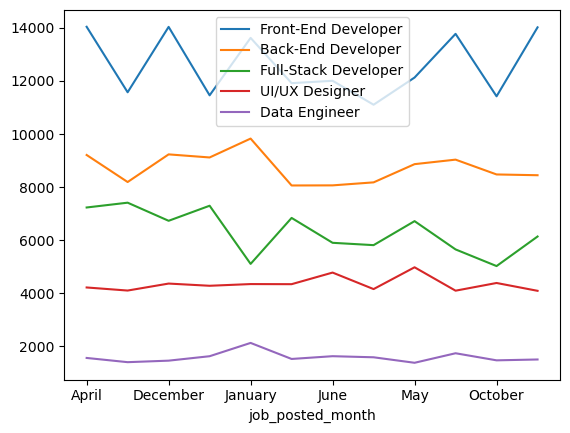

In [38]:
df_us_merged[top_5].plot(kind='line')